### Question
Broad Question #2:
    We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.  
Question: Can age, start time, end time, and user's average session length predict their hours played in PLAICraft? 

### Datasets
The `player.csv`  dataset contains information describing the users. It is contains 196 observations (users) and 7 variables about them. 
<br>Those variables are:
- `experience` -- character, self identified level of experience
- `subscribe` -- logical, whether the user is subscribed to the blog
- `hashedEmail` -- character, hashed form of user email
- `played_hours` -- double, total time in hours a user has been on the server
- `name` -- character, user name
- `gender` -- character, user gender
- `Age` -- double, user age.

The `sessions.csv` dataset contains information describing the times when users are online. It contains 1535 observations and 5 variables.
Those variables are:
- `hashedEmail` -- character, hashed form of user email
- `start_time` -- character, date and time when user joins the server
- `end_time` -- character, date and time when user leaves the server
- `original_start_time` -- double, `start_time` in milliseconds
- `original_end_time` -- double, `end_time` in milliseconds

There does not appear to be any issues with the data itself, however the way in which `plaicraft.ai` operates in regards to allotted time could skew the amount of time a user is online. For instance, if there was no one else online for them to talk with, they would be limited to the amount of time they have access to on the server.

In [1]:
library(tidyverse)
library(repr)

player_url <- "https://raw.githubusercontent.com/n-b-t/DSCI-100-Project-individual-/refs/heads/main/data/players.csv"
player_data <- read_csv(player_url)

head(player_data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [2]:
sessions_url <- "https://raw.githubusercontent.com/n-b-t/DSCI-100-Project-individual-/refs/heads/main/data/sessions.csv"
sessions_data <- read_csv(sessions_url)

sessions_tidy <- sessions_data |>
                mutate(start_date_time = dmy_hm(start_time), #dttm column with date and time together
                       end_date_time = dmy_hm(end_time)) |>
                separate(start_time, into = c("start_date", "start_time"), sep = " ") |> #seperate date and time columns
                separate(end_time, into = c("end_date", "end_time"), sep = " ") |>
                mutate(start_date = dmy(start_date), start_time = as.duration(hm(start_time)), #covert seperated date and time
                       end_date = dmy(end_date), end_time = as.duration(hm(end_time)))         #into type date and period
#start_time and end_time columns are still time since midnight (00:00)
head(sessions_tidy)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time,start_date_time,end_date_time
<chr>,<date>,<Duration>,<date>,<Duration>,<dbl>,<dbl>,<dttm>,<dttm>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30,65520s (~18.2 hours),2024-06-30,66240s (~18.4 hours),1.71977e+12,1.71977e+12,2024-06-30 18:12:00,2024-06-30 18:24:00
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17,84780s (~23.55 hours),2024-06-17,85560s (~23.77 hours),1.71867e+12,1.71867e+12,2024-06-17 23:33:00,2024-06-17 23:46:00
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25,63240s (~17.57 hours),2024-07-25,64620s (~17.95 hours),1.72193e+12,1.72193e+12,2024-07-25 17:34:00,2024-07-25 17:57:00
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25,12120s (~3.37 hours),2024-07-25,14280s (~3.97 hours),1.72188e+12,1.72188e+12,2024-07-25 03:22:00,2024-07-25 03:58:00
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25,57660s (~16.02 hours),2024-05-25,58320s (~16.2 hours),1.71665e+12,1.71665e+12,2024-05-25 16:01:00,2024-05-25 16:12:00
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23,54480s (~15.13 hours),2024-06-23,61800s (~17.17 hours),1.71916e+12,1.71916e+12,2024-06-23 15:08:00,2024-06-23 17:10:00


In [3]:
combined_data <- merge(player_data, sessions_tidy, "hashedEmail")
head(combined_data)

,hashedEmail,experience,subscribe,played_hours,name,gender,Age,start_date,start_time,end_date,end_time,original_start_time,original_end_time,start_date_time,end_date_time
,<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<date>,<Duration>,<date>,<Duration>,<dbl>,<dbl>,<dttm>,<dttm>
1,0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,2024-05-23,1320s (~22 minutes),2024-05-23,4020s (~1.12 hours),1.71642e+12,1.71643e+12,2024-05-23 00:22:00,2024-05-23 01:07:00
2,0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,2024-05-22,83520s (~23.2 hours),2024-05-23,780s (~13 minutes),1.71642e+12,1.71642e+12,2024-05-22 23:12:00,2024-05-23 00:13:00
3,060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,FALSE,0.4,Lyra,Male,21,2024-06-28,16080s (~4.47 hours),2024-06-28,17880s (~4.97 hours),1.71955e+12,1.71955e+12,2024-06-28 04:28:00,2024-06-28 04:58:00
4,0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,Beginner,TRUE,0.1,Osiris,Male,17,2024-09-19,75660s (~21.02 hours),2024-09-19,76320s (~21.2 hours),1.72678e+12,1.72678e+12,2024-09-19 21:01:00,2024-09-19 21:12:00
5,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,2024-08-30,13200s (~3.67 hours),2024-08-30,14640s (~4.07 hours),1.72499e+12,1.72499e+12,2024-08-30 03:40:00,2024-08-30 04:04:00
6,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,2024-08-27,69480s (~19.3 hours),2024-08-27,71520s (~19.87 hours),1.72479e+12,1.72479e+12,2024-08-27 19:18:00,2024-08-27 19:52:00


### Summaries

In [4]:
player_data_age_hours <- select(player_data,played_hours, Age)

player_data_numeric_summaries <- 
    bind_cols(summary = c("Mean", "Standard Deviation", "Mode","Minimum","Maximum", 
                          "1st Quartile", "2nd Quartile", "3rd Quartile"),
              bind_rows(map_df(player_data_age_hours, mean, na.rm = TRUE), #mean
                        map_df(player_data_age_hours, sd, na.rm = TRUE), #std dev
                        bind_cols(played_hours = group_by(player_data_age_hours, played_hours) |>  #mode
                                          summarize(count = n()) |>slice_max(count) |> pull(played_hours), 
                                  Age = group_by(player_data_age_hours, Age) |> summarize(count = n()) |>
                                          slice_max(count) |> pull(Age)),
                        map_df(player_data_age_hours, range, na.rm = TRUE), #min + max
                        tibble(played_hours = quantile(pull(player_data_age_hours,played_hours), #quartiles
                                                       c(0.25, 0.5, 0.75), na.rm = TRUE),
                               Age = quantile(pull(player_data_age_hours,Age), 
                                              c(0.25, 0.5, 0.75), na.rm = TRUE)))) |>
    mutate(across(played_hours:Age, round, 2)) #rounding

player_data_numeric_summaries

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(played_hours:Age, round, 2)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


summary,played_hours,Age
<chr>,<dbl>,<dbl>
Mean,5.85,21.14
Standard Deviation,28.36,7.39
Mode,0.00,17.00
Minimum,0.00,9.00
Maximum,223.10,58.00
1st Quartile,0.00,17.00
2nd Quartile,0.10,19.00
3rd Quartile,0.60,22.75


In [5]:
player_data_category <- select(player_data, experience, subscribe, gender)

experience_summary <- player_data_category |> group_by(experience) |> summarize(number = n()) |> arrange(-number) |>
                                mutate(percent_total = round(number/nrow(player_data_category)*100,2))
subscribe_summary <- player_data_category |> group_by(subscribe) |> summarize(number = n()) |> arrange(-number) |>
                                mutate(percent_total = round(number/nrow(player_data_category)*100,2))                      
gender_summary <- player_data_category |> group_by(gender) |> summarize(number = n()) |> arrange(-number) |>
                                mutate(percent_total = round(number/nrow(player_data_category)*100,2)) 


experience_summary
subscribe_summary
gender_summary

experience,number,percent_total
<chr>,<int>,<dbl>
Amateur,63,32.14
Veteran,48,24.49
Regular,36,18.37
Beginner,35,17.86
Pro,14,7.14


subscribe,number,percent_total
<lgl>,<int>,<dbl>
TRUE,144,73.47
FALSE,52,26.53


gender,number,percent_total
<chr>,<int>,<dbl>
Male,124,63.27
Female,37,18.88
Non-binary,15,7.65
Prefer not to say,11,5.61
Two-Spirited,6,3.06
Agender,2,1.02
Other,1,0.51


In [6]:
session_tidy_times <- sessions_tidy |> select(-hashedEmail)

sessions_tidy_summaries <- 
    bind_cols(summary = c("Mean", "Minimum","Maximum","Standard Deviation","1st quartile", "2nd quartile", "3rd quartile"), #statistic
                bind_rows(map_df(session_tidy_times, mean, na.rm = TRUE), #mean
                          map_df(session_tidy_times, range, na.rm = TRUE), #min & max
                          map_df(session_tidy_times |>
                                 select(start_time, end_time, original_start_time, original_end_time), 
                                 sd, na.rm = TRUE),
                           tibble(start_time = as.double(quantile(pull(session_tidy_times,start_time), #quartiles
                                                        c(0.25, 0.5, 0.75), na.rm = TRUE)),
                                  end_time = as.double(quantile(pull(session_tidy_times,end_time), 
                                                     c(0.25, 0.5, 0.75), na.rm = TRUE)),
                                  start_date_time = (quantile(pull(session_tidy_times,start_date_time), 
                                                     c(0.25, 0.5, 0.75), na.rm = TRUE)),
                                  end_date_time = (quantile(pull(session_tidy_times,end_date_time), 
                                                     c(0.25, 0.5, 0.75), na.rm = TRUE)),
                                 original_start_time = quantile(pull(session_tidy_times,original_start_time), 
                                                                c(0.25, 0.5, 0.75), na.rm = TRUE),
                                 original_end_time = quantile(pull(session_tidy_times,original_end_time),
                                                              c(0.25, 0.5, 0.75), na.rm = TRUE))))
                       
#unable to find clear way to compute quartiles of <date> variables AND display them as <date>
#nor compute standard deviation of non double types

sessions_tidy_summaries

summary,start_date,start_time,end_date,end_time,original_start_time,original_end_time,start_date_time,end_date_time
<chr>,<date>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>
Mean,2024-06-23,38471.92,2024-06-23,36338.12,1.719201e+12,1.719196e+12,2024-06-24 03:54:03,2024-06-24 02:26:18
Minimum,2024-04-06,0.00,2024-04-06,0.00,1.712400e+12,1.712400e+12,2024-04-06 09:27:00,2024-04-06 09:31:00
Maximum,2024-09-26,86340.00,2024-09-26,86340.00,1.727330e+12,1.727340e+12,2024-09-26 06:09:00,2024-09-26 07:39:00
Standard Deviation,NA,30617.43,NA,29315.95,3.557492e+09,3.552813e+09,NA,NA
1st quartile,NA,11460.00,NA,12960.00,1.716240e+12,1.716240e+12,2024-05-20 20:28:00,2024-05-20 21:37:00
2nd quartile,NA,23520.00,NA,22500.00,1.719200e+12,1.719180e+12,2024-06-24 02:51:00,2024-06-23 22:04:00
3rd quartile,NA,71490.00,NA,67980.00,1.721890e+12,1.721890e+12,2024-07-25 06:56:00,2024-07-25 07:00:00


### Exploratory Visualizations

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


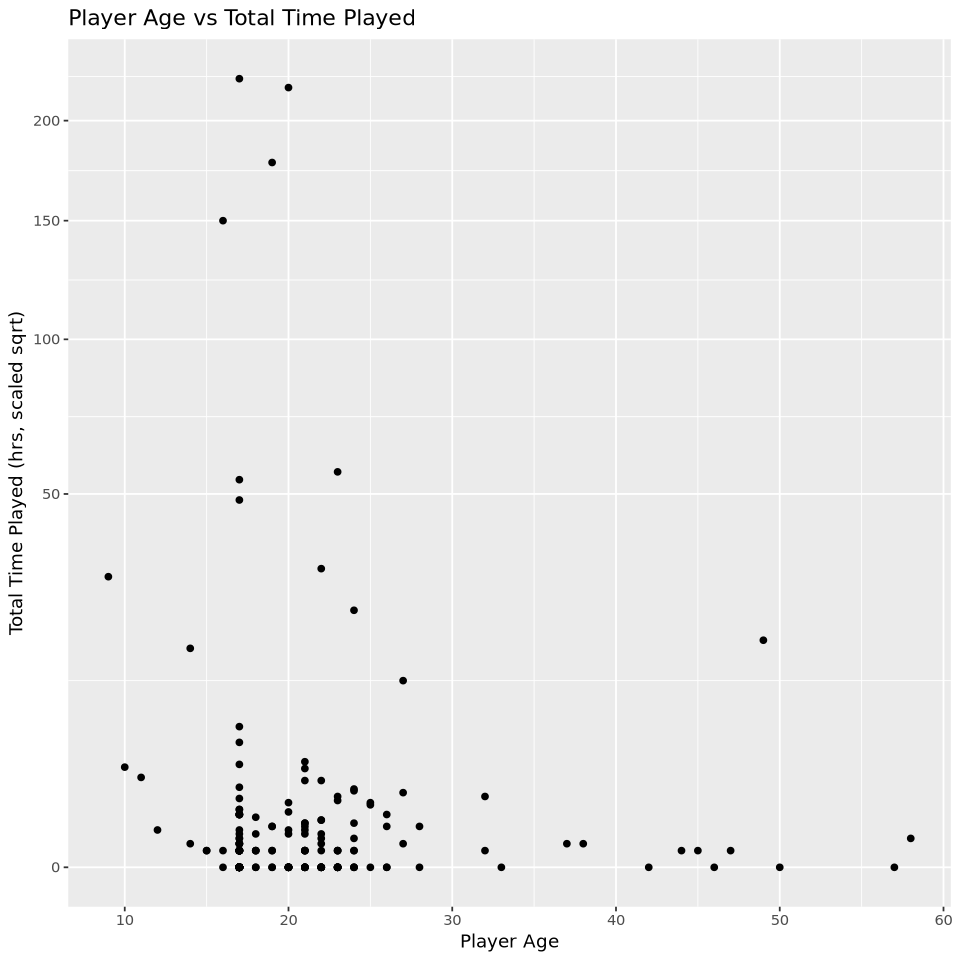

In [7]:
options(repr.plot.width = 8, repr.plot.height = 8)
age_plot <- player_data |>
                    ggplot(aes(x = Age, played_hours)) +
                    geom_point() +
                    labs(x = "Player Age", y = "Total Time Played (hrs, scaled sqrt)",
                         title = "Player Age vs Total Time Played") +
                    theme(text = element_text(30)) +
                    scale_y_sqrt()
age_plot

Based on the *Player Age vs Total Time Played* graph, the majority of users are below 30, and most of the higher `played_hours` are from users around the age of 20.

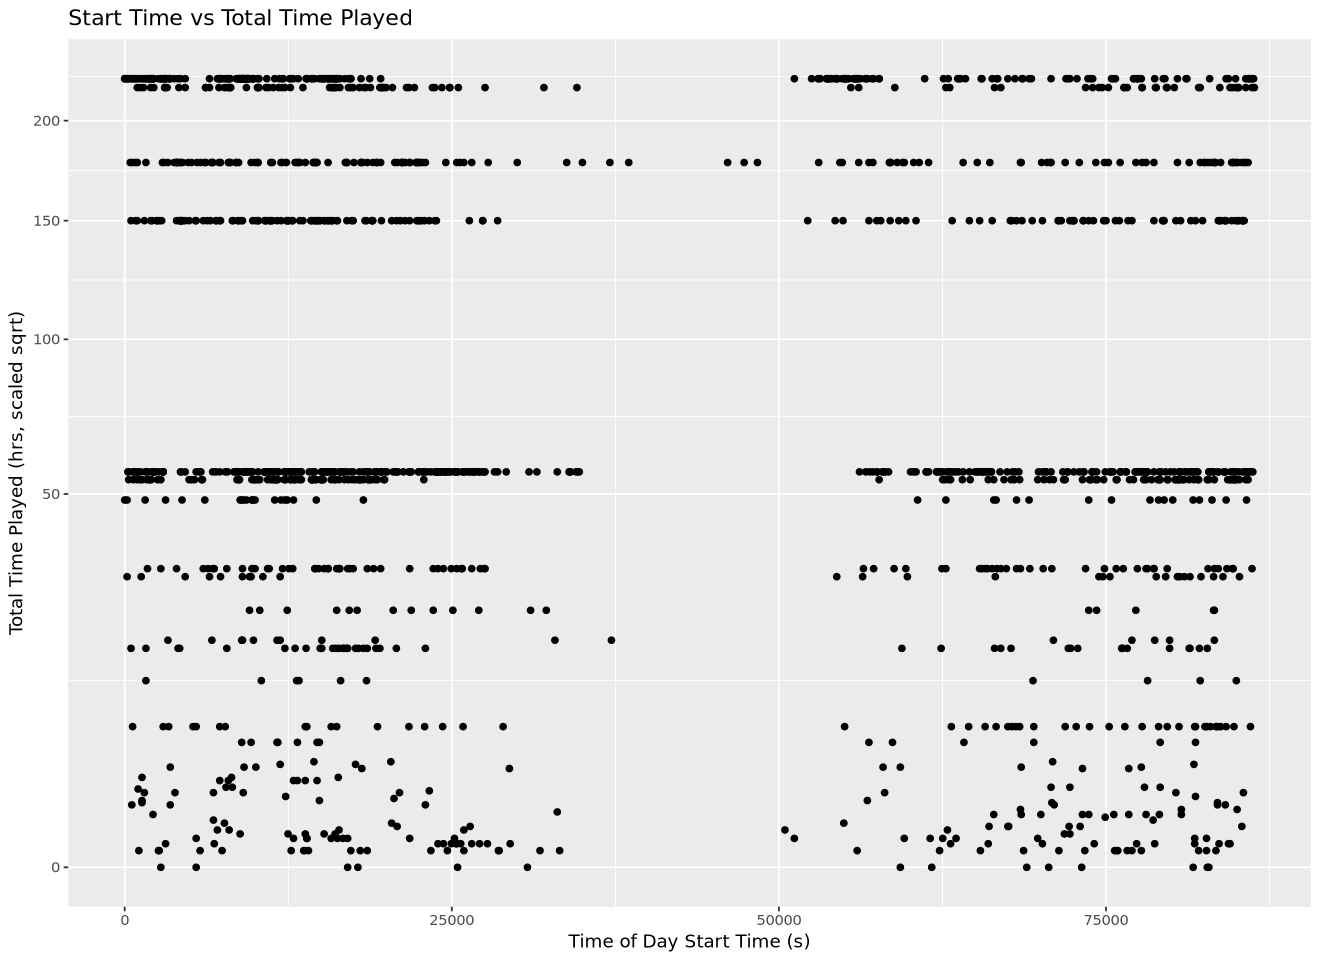

In [11]:
options(repr.plot.width = 11)

start_time_plot <-  combined_data |>
                    ggplot(aes(x = start_time, played_hours)) +
                    geom_point() +
                    labs(x = "Time of Day Start Time (s)", y = "Total Time Played (hrs, scaled sqrt)",
                         title = "Start Time vs Total Time Played") +
                    theme(text = element_text(30)) +
                    scale_y_sqrt()
start_time_plot

Based on the *Start Time vs Total Time Played* graph, the does not appear to be a direct relationship between session start time and total play time, but the number of times a session is started does seem to be related. Also intrestingly, users rarely start a session around \~11:30 (~41,500s).

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


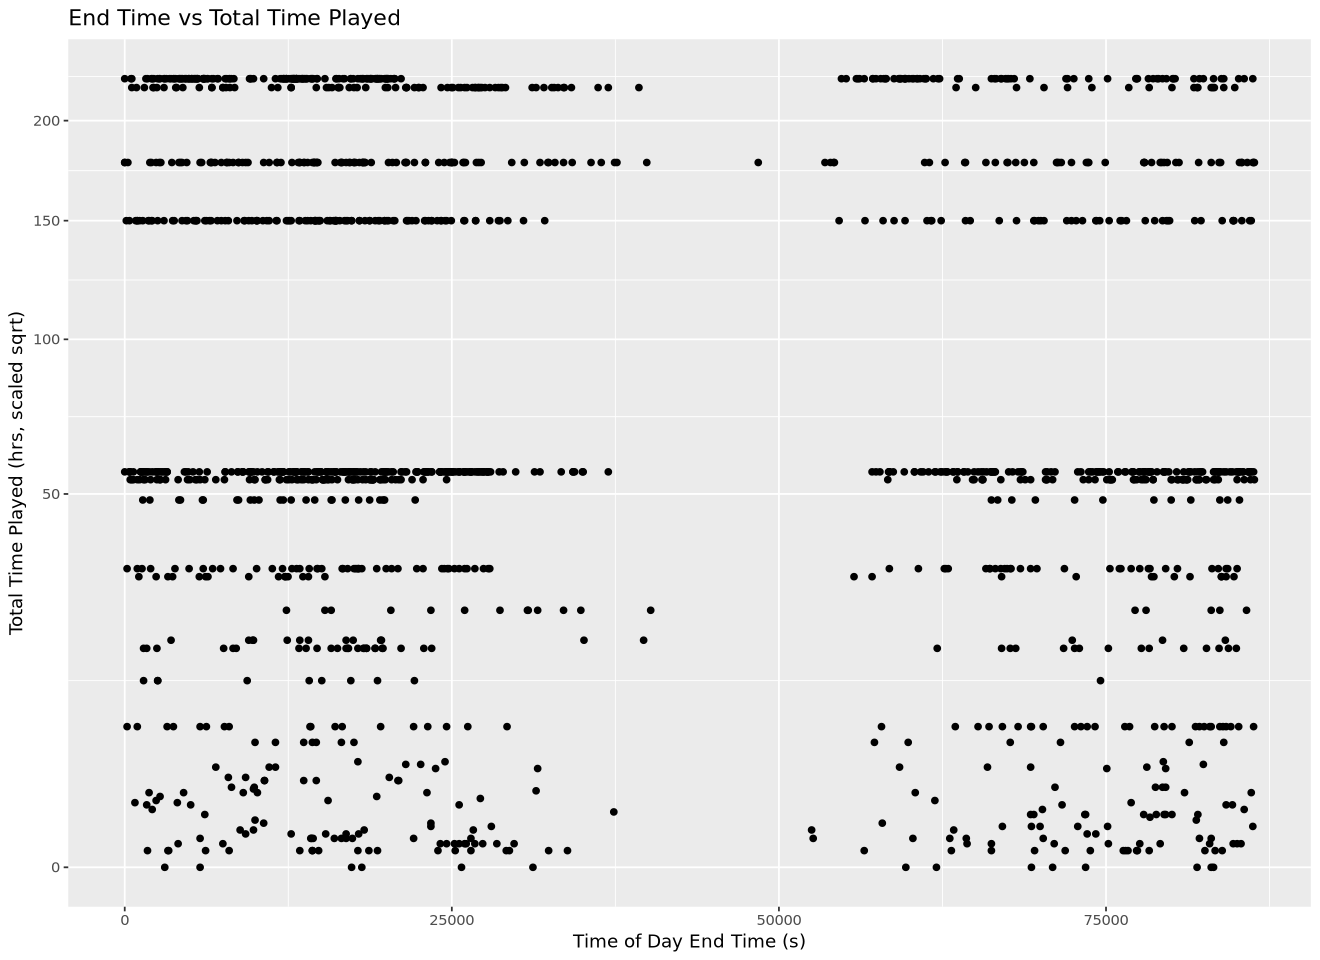

In [13]:
end_time_plot <-  combined_data |>
                    ggplot(aes(x = end_time, played_hours)) +
                    geom_point() +
                    labs(x = "Time of Day End Time (s)", y = "Total Time Played (hrs, scaled sqrt)",
                         title = "End Time vs Total Time Played") +
                    theme(text = element_text(30)) +
                    scale_y_sqrt()
end_time_plot

Similar to the *Start Time vs Hours Played* graph, there seems to be no relationship, and scarcity around 11:30.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


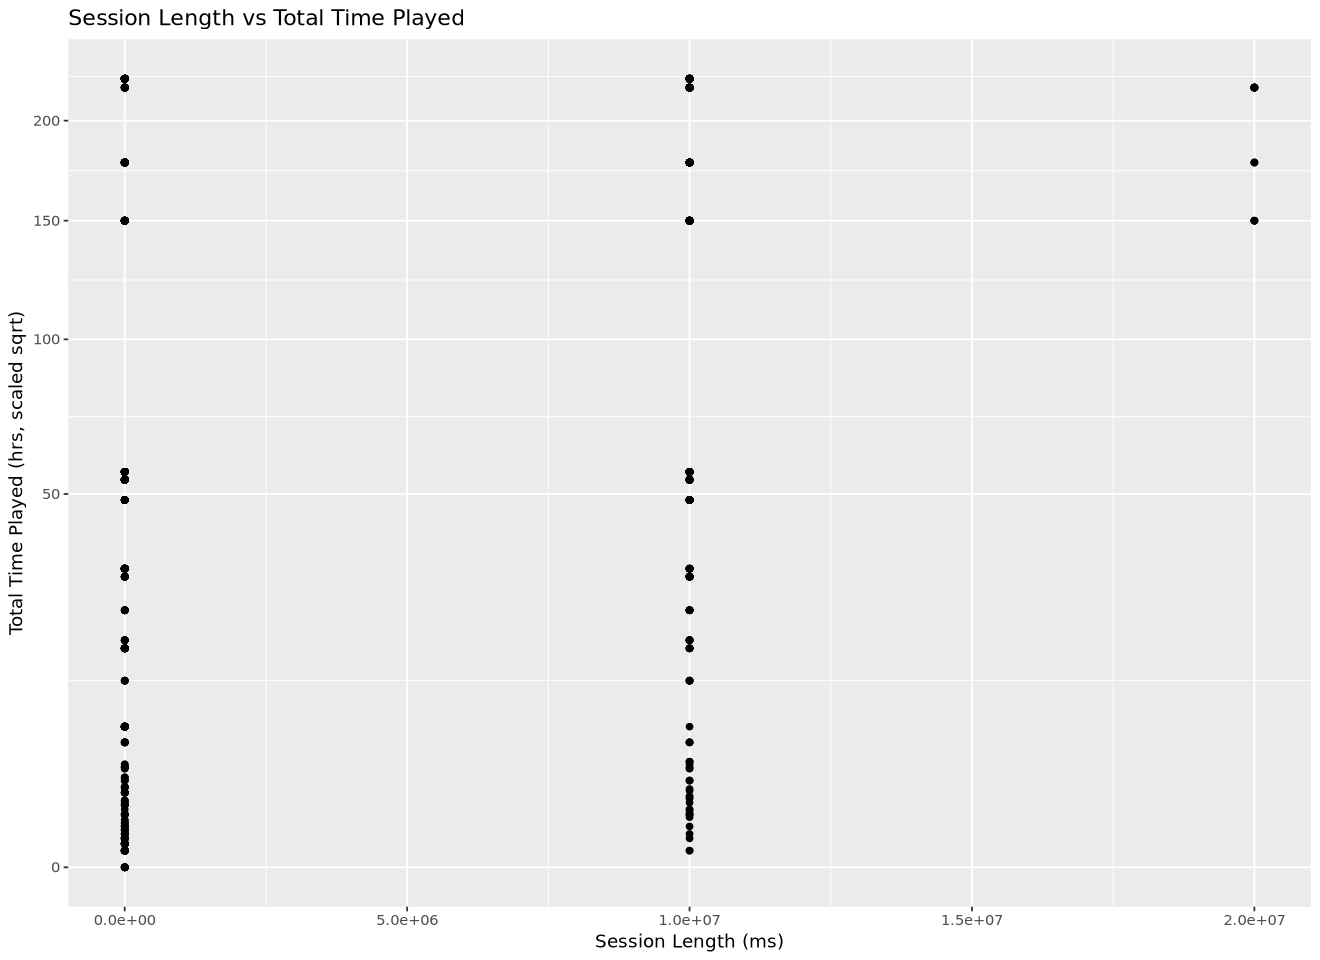

In [10]:
session_length_plot <-  combined_data |>
                    ggplot(aes(x = original_end_time-original_start_time, played_hours)) +
                    geom_point() +
                    labs(x = "Session Length (s)", y = "Total Time Played (hrs, scaled sqrt)",
                         title = "Session Length vs Total Time Played") +
                    theme(text = element_text(30)) +
                    scale_y_sqrt()
session_length_plot

From *Session Length vs Total Time Played* it can be seen that the `original_start_time` and `original_end_time` variables do not have enough precision to convey short intervals of time, therefore `start_time` and `end_time` will need to be used in place of all instances of `original_start_time` and `original_end_time`.

### Method
One method to answer the proposed question using `player.csv` and `sessions.csv` is via knn regression with the `played_hours` as the response variables, and age, start time, and average session length as the potential predictors. This is an appropriate method to use because the response variable is numeric and we are attempting to use information about a user to predict whether they will contribute significant amounts of data.

Since the amount of data collected in the study is directly related to the amount of active time a user plays, the `played_hours` variable is a good approach to classifying large and not large amounts of data being contributed.   



The model requires all the predictors to be numerical data, and on a comparable scale to avoid unequal influence from a single predictor.

One of the weaknesses of this model might be accurately predicting values of `played_hours` between ~60 and ~150,  as well as any points beyond the area of the training data since there are no nearby points in the data for it to reference.

The data will be split 80% training data and 20% testing data, so unseen data can be used to assess the performance of the model after training. To train the model, 5 fold cross validation will first be used in order to determine an ideal K value to use in the final model as well as forward selection for which predictors to use. The model with the lowest rmse will be chosen.